### Machine Learning Model

In [46]:
# Import dependencies
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np


from selenium.webdriver.support.ui import Select
driver = webdriver.Chrome()
from selenium.webdriver.common.by import By
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.orm import Session
from mysql_conn import password
import datetime
import os

In [50]:
car_sales_df = pd.read_excel('combined-feat-sales_v2.xlsx')
car_sales_df

,Axander-Model,id,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,BMW 7-series,272,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,BMW 7-series,273,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,BMW 7-series,274,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,BMW 7-series,275,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,BMW 7-series,276,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,BMW 7-series,277,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,Chevrolet Colorado,487,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,Chevrolet Colorado,488,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,Chevrolet Colorado,489,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,Chevrolet Colorado,490,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [52]:
car_sales = car_sales_df.copy()
car_sales = car_sales.fillna('0')
car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Axander-Model', 'id'], axis=1)
 

car_sales_clean

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [53]:
car_sales_clean.describe()

,year,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,comb_CO2,Sales_2016,Sales_2017,Sales_2018
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2017.031373,5.407843,21.617647,26.382353,23.266667,4.170588,439.409804,173989.580392,175896.925490,66592.145098
std,0.816695,1.574083,19.663947,14.913005,17.298701,1.663286,110.348861,176631.523989,181628.055205,76425.495021
min,2016.000000,3.000000,13.000000,15.000000,14.000000,1.000000,0.000000,609.000000,529.000000,1148.000000
25%,2016.000000,5.000000,15.000000,20.000000,17.000000,3.000000,411.500000,26544.250000,30047.000000,5758.750000
50%,2017.000000,6.000000,17.000000,23.000000,19.000000,4.000000,459.000000,108257.000000,109657.000000,30244.000000
75%,2018.000000,6.000000,20.000000,26.000000,22.000000,5.000000,502.000000,207299.000000,204211.000000,94829.000000
max,2018.000000,10.000000,126.000000,103.000000,114.000000,10.000000,615.000000,537013.000000,550311.000000,228947.000000


In [54]:
car_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 18 columns):
year                    510 non-null int64
model                   510 non-null object
fuel_type               510 non-null object
vehicle_class           510 non-null object
displ                   510 non-null object
cyl                     510 non-null object
trans                   510 non-null object
drive                   510 non-null object
smog_rating             510 non-null int64
city_mpg                510 non-null float64
hwy_mpg                 510 non-null float64
cmb_mpg                 510 non-null float64
Greenhouse_gas_score    510 non-null int64
smartway                510 non-null object
comb_CO2                510 non-null float64
Sales_2016              510 non-null int64
Sales_2017              510 non-null int64
Sales_2018              510 non-null int64
dtypes: float64(4), int64(6), object(8)
memory usage: 71.8+ KB


In [55]:
car_sales_clean.isnull().sum()

year                    0
model                   0
fuel_type               0
vehicle_class           0
displ                   0
cyl                     0
trans                   0
drive                   0
smog_rating             0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
Greenhouse_gas_score    0
smartway                0
comb_CO2                0
Sales_2016              0
Sales_2017              0
Sales_2018              0
dtype: int64

In [56]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,23,50,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)

In [57]:
car_sales_sliced

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,medium-mpg,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,medium-mpg,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,low-mpg,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,low-mpg,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,low-mpg,4,No,459.0,12071,8731,7909
5,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,6,16.0,25.0,low-mpg,4,No,459.0,12071,8731,7909
6,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,low-mpg,5,No,397.0,103217,106583,20848
7,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,low-mpg,5,No,397.0,103217,106583,20848
8,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,low-mpg,5,No,426.0,103217,106583,20848
9,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,low-mpg,5,No,426.0,103217,106583,20848


In [59]:
car_sales_sliced['cmb_mpg'].unique()

[medium-mpg, low-mpg, high-mpg]
Categories (3, object): [low-mpg < medium-mpg < high-mpg]

In [60]:
lb = LabelEncoder()

In [63]:
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['model']= lb.fit_transform(car_sales_encoded['model'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,2016,2,3,0,4.4,8,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,2016,2,3,0,4.4,8,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,2016,2,3,0,4.4,8,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [64]:
car_sales_encoded['cmb_mpg'].value_counts()

1    411
2     81
0     18
Name: cmb_mpg, dtype: int64

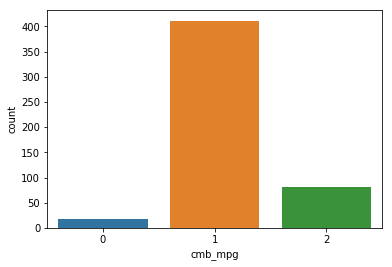

In [65]:
sns.countplot(car_sales_encoded['cmb_mpg'])

In [66]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']

In [67]:
# Train and test 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)



In [68]:
# Apply Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train[:10]

array([[-3.92709818e-02,  1.63146529e+00,  3.87783367e-01,
        -3.50809926e-01, -6.81489451e-01, -1.02691700e+00,
         3.87622099e-01,  1.07115285e+00,  1.00020386e+00,
        -1.31049663e-01, -3.59189551e-01, -1.00153788e-01,
        -5.86786793e-02,  7.38264638e-02,  1.29369880e-02,
         3.69816088e-02,  2.11775127e+00],
       [ 1.19323368e+00, -1.25155210e+00, -3.56760698e+00,
        -3.50809926e-01, -6.15570130e-01, -1.02691700e+00,
        -7.58391063e-01, -9.33573582e-01, -1.54237045e+00,
         2.37812131e-02,  2.52991480e-01, -1.00153788e-01,
        -5.86786793e-02, -2.41437263e-01, -4.09912391e-01,
        -3.92537552e-01, -6.10319923e-01],
       [ 1.19323368e+00,  1.29228677e+00, -2.24914353e+00,
         1.01885945e+00, -2.46131112e+00, -3.08579729e+00,
        -1.52239984e+00, -9.33573582e-01,  2.90713460e+00,
         4.66870751e+00,  4.40221846e+00,  3.45312844e+00,
        -3.47880742e+00, -3.96154924e+00, -9.83088728e-01,
        -9.68914527e-01, -8.6

# Random Forest Classifer

In [95]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [96]:
pred_rfc[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [97]:
# How well model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.99      0.99        84
          2       0.93      1.00      0.97        14

avg / total       0.99      0.99      0.99       102

[[ 4  0  0]
 [ 0 83  1]
 [ 0  0 14]]


# SVM Classifier

In [98]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
pred_clf[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [99]:
# How well model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       0.98      1.00      0.99        84
          2       1.00      0.86      0.92        14

avg / total       0.98      0.98      0.98       102

[[ 4  0  0]
 [ 0 84  0]
 [ 0  2 12]]


# Neural Network

In [100]:
mplc = MLPClassifier(hidden_layer_sizes=(17,17,17),max_iter=700)
mplc.fit(X_train,y_train)
pred_mlpc = mplc.predict(X_test)
pred_mlpc[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [101]:
# How well model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00        84
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00       102

[[ 4  0  0]
 [ 0 84  0]
 [ 0  0 14]]


In [103]:
from sklearn.metrics import accuracy_score
cm_rfc = accuracy_score(y_test,pred_rfc)
cm_clf = accuracy_score(y_test,pred_clf)
cm_mlpc = accuracy_score(y_test,pred_mlpc)
print(f'CM RFC Score: {cm_rfc}')
print(f'CM CLF Score: {cm_clf}')
print(f'CM MLPC Score: {cm_mlpc}')

CM RFC Score: 0.9901960784313726
CM CLF Score: 0.9803921568627451
CM MLPC Score: 1.0


# Discussion
* The Neural Network MPLC received the best CM accuracy score. The MPLC model correctly predicted whether car type is low-mpg, medium-mpg, high-mpg 100% of the time.
* The Random Forest RFC received the next best CM accuracy score. The RFC correctly predicted low-mpg and high-mpg 100% of the time. But mislabled 1 high-mpg.
* Lastly, the SVM model received a 98% accuracy score. The SVM correctly predicted low-mpg and medium-mpg 100% of the time but mislabled 2 high-mpgs

# A Step Further
* Test model against new data the model has never seen

In [104]:
car_sales_encoded.head()

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,2016,2,3,0,4.4,8,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,2016,2,3,0,4.4,8,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,2016,2,3,0,4.4,8,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [107]:
Xnew = [[2017,5,2,1,4.4,6,8,1,3,22.0,29.9,4,2,436.0,1407,8835,7909]]
Xnew = sc.transform(Xnew)
ynew = mplc.predict(Xnew)
ynew

array([2], dtype=int64)

## Discussion
* Based on the new X values, the MPLC model predicts this is a medium-mpg car

# Linear Regression

In [152]:
car_sales_2016 = car_sales_clean.iloc[:,1:16]
car_sales_2016.head()

,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016
0,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071
1,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071
2,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071
3,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071
4,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071


In [154]:
X = car_sales_2016.iloc[:, :-1].values
y = car_sales_2016.iloc[:, 14].values

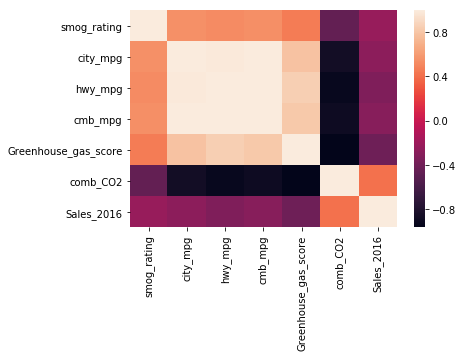

In [155]:
# Data Visualization
# Building the Correlation matrix
sns.heatmap(car_sales_2016.corr())

In [156]:
models = car_sales_2016['model'].nunique()
fuel_type = car_sales_2016['fuel_type'].nunique()
vehicle_class = car_sales_2016['vehicle_class'].nunique()
trans = car_sales_2016['trans'].nunique()
drive = car_sales_2016['drive'].nunique()
smartway = car_sales_2016['smartway'].nunique()

print(f'Total Model Cats: {models}')
print(f'Total fuel_type Cats: {fuel_type}')
print(f'Total vehicle_class Cats: {vehicle_class}')
print(f'Total trans Cats: {trans}')
print(f'Total drive Cats: {drive}')
print(f'Total smartway Cats: {smartway}')



Total Model Cats: 22
Total fuel_type Cats: 5
Total vehicle_class Cats: 8
Total trans Cats: 10
Total drive Cats: 2
Total smartway Cats: 3


In [165]:
X[:,12]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Elite', 'Elite', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Elite', 'Elite', 'Elite', 'Elite', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [166]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

# Transform Models column
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [22])

# Transform fuel_type column
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [5])

# Transform veh_class column
X[:, 2] = labelencoder.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [8])

# Transform transmission column
X[:, 5] = labelencoder.fit_transform(X[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [10])

# Transform drive column
X[:, 6] = labelencoder.fit_transform(X[:, 6])
onehotencoder = OneHotEncoder(categorical_features = [2])

# Transfor smartway column
X[:, 12] = labelencoder.fit_transform(X[:, 12])
onehotencoder = OneHotEncoder(categorical_features = [3])

X = onehotencoder.fit_transform(X).toarray()
print(X[0])

[  0.   0.   0.   1.   0.   0.   0.   1.   3.   0.   6.   9.   0.   6.
  21.  29.  24.   5.   1. 371.]


In [167]:
# Avoiding dummy issue
X = X[:, 1:]
X[0]

array([  0.,   0.,   1.,   0.,   0.,   0.,   1.,   3.,   0.,   6.,   9.,
         0.,   6.,  21.,  29.,  24.,   5.,   1., 371.])

In [168]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [169]:
# Fitting Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([295758.99161744, 325731.12096473, 135832.99131067,  42866.11134165,
       383956.87189675,  72737.58468736, 371378.08252198, 312184.70618633,
        39227.55122391, 455089.09922789, 441441.94133197, 385669.53908445,
       355477.68606641,  53372.48572036, -34626.09966824, 444888.92515907,
       -53203.742927  , 321530.38228434, 117228.26383243, -11425.96627196,
       117015.158357  , 115521.50843908, 120066.77051156, 282361.30928855,
        30537.92152115, 369365.97175547,  64132.82580659, 186605.16724648,
       -13300.62278772, 282166.00101252,  29985.73111945, 453119.31962775,
        19644.77963814, 117228.26383243,  34059.25468472,  36367.45164277,
       377062.90424254,  65927.42821353,  28886.5997426 , 440336.89814957,
       145110.15887514,  29004.93710145, 105180.55695777, 282166.00101252,
       103607.14038952,  36101.58677271, 158849.65245815, 308737.72235923,
       381317.21318979,  28781.7559772 ,  28669.04980325,  44348.21555525,
       -63544.69440831, -

In [171]:
# Calculating the Coefficients
print(regressor.coef_)

[ 3.30029514e+05  3.80611048e+05  5.45836135e+05  6.48753644e+05
  8.88673241e+05  9.41315553e+05 -9.02427017e+03 -2.54252089e+04
 -8.23432966e+02 -5.08248414e+04 -3.49323531e+03  3.27654006e+04
  3.44698383e+03  9.42697174e+03 -4.41941513e+04  1.95454182e+04
 -3.42703166e+03 -6.43039909e+04 -1.49715640e+03]


In [172]:
# Calculating the Intercept
print(regressor.intercept_)

1265477.7953836573


In [173]:
# Calculating the R squared value. Looking at the error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.603634852264903

# Discussion
* The R<sup>2</sup> score shows that this is not a valid prediction
* This is not a good model.
* We should retrain our model. Perhaps consider dropping some of the X values

# Next steps:
* Use a classifier model to predict fuel type (gasoline, electricity, hybrid(Gasoline/Electricty)
* Users can input the features of the car and the model will predict the fuel type

In [193]:
car_fuel_pred = car_sales_clean.copy()
fuel_type = car_fuel_pred['fuel_type'].unique()
fuel_type_count = car_fuel_pred['fuel_type'].nunique()
print(f'Unique fuel type values: {fuel_type}')
print(f'Total unique fuel types: {fuel_type_count}')

Unique fuel type values: ['Gasoline' 'Diesel' 'Ethanol/Gas' 'Electricity' 'Gasoline/Electricity']
Total unique fuel types: 5


# Classification: The Decision Tree Model
* Classifying the vehicle class type
* Classifying the fuel type

# Model will have 3 fuel types:
* Gas = gasoline
* Elec = electricity
* hybrid = gasonline/eletricity
* Note: Diesal and Ethanol/Gas values will be drop

In [ ]:
# Create new data frame that only includes cars will 3 fuel types

In [195]:
# import dependecies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [198]:
 # Classify if car is high/low resale car
# import car-sales csvs
car_class = pd.read_excel('combined-feat-sales_v3.xlsx')
car_class_df = car_class.copy()
car_class_df = car_class.fillna('0')
car_class_clean = car_class_df.copy()
car_class_clean = car_class_df.drop(['Axander-Model', 'id','year'], axis=1)

car_class_clean.head()

,Resale-Cat,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,Low,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,Low,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [199]:
# print dataset info

car_class_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 18 columns):
Resale-Cat              510 non-null object
model                   510 non-null object
fuel_type               510 non-null object
vehicle_class           510 non-null object
displ                   510 non-null object
cyl                     510 non-null object
trans                   510 non-null object
drive                   510 non-null object
smog_rating             510 non-null int64
city_mpg                510 non-null float64
hwy_mpg                 510 non-null float64
cmb_mpg                 510 non-null float64
Greenhouse_gas_score    510 non-null int64
smartway                510 non-null object
comb_CO2                510 non-null float64
Sales_2016              510 non-null int64
Sales_2017              510 non-null int64
Sales_2018              510 non-null int64
dtypes: float64(4), int64(5), object(9)
memory usage: 71.8+ KB


In [201]:
# Print Length of Data
print("Dataset Length:: ", len(car_class_clean))
print("Dataset Shape:: ", car_class_clean.shape)

Dataset Length::  510
Dataset Shape::  (510, 18)


In [202]:
print("Dataset:: ")
car_class_clean.head()

Dataset:: 


,Resale-Cat,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,Low,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,Low,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,Low,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [203]:
# Drop model column
car_final_df = car_class_clean.copy()
car_final_df = car_class_clean.drop(['model'], axis=1)
car_final_df.head()

,Resale-Cat,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,Low,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,Low,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,Low,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


## Encode all values expect Y-Resale-Cat

In [204]:
# Find total unique values of each column

fuel_type = car_final_df['fuel_type'].nunique()
vehicle_class = car_final_df['vehicle_class'].nunique()
trans = car_final_df['trans'].nunique()
drive = car_final_df['drive'].nunique()
smartway = car_final_df['smartway'].nunique()

print(f'Total fuel_type Cats: {fuel_type}')
print(f'Total vehicle_class Cats: {vehicle_class}')
print(f'Total trans Cats: {trans}')
print(f'Total drive Cats: {drive}')
print(f'Total smartway Cats: {smartway}')


Total fuel_type Cats: 5
Total vehicle_class Cats: 8
Total trans Cats: 10
Total drive Cats: 2
Total smartway Cats: 3


In [210]:
# Seperating the Target variable
X = car_final_df.values[:, 1:]
y = car_final_df.values[:, 0]

In [217]:
X[:,11]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Elite', 'Elite', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Elite', 'Elite', 'Elite', 'Elite', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [218]:
# Encode X object type variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()


# Transform fuel_type column
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [5])

# Transform veh_class column
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [8])

# Transform transmission column
X[:, 4] = labelencoder.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [10])

# Transform drive column
X[:, 5] = labelencoder.fit_transform(X[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [2])

# Transfor smartway column
X[:, 11] = labelencoder.fit_transform(X[:, 11])
onehotencoder = OneHotEncoder(categorical_features = [3])

X = onehotencoder.fit_transform(X).toarray()
print(X[0])

[0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 0.0000e+00
 3.0000e+00 9.0000e+00 0.0000e+00 6.0000e+00 2.1000e+01 2.9000e+01
 2.4000e+01 5.0000e+00 1.0000e+00 3.7100e+02 1.2071e+04 8.7310e+03
 7.9090e+03]


In [219]:
# Avoiding dummy issue
X = X[:, 1:]
X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
       3.0000e+00, 9.0000e+00, 0.0000e+00, 6.0000e+00, 2.1000e+01,
       2.9000e+01, 2.4000e+01, 5.0000e+00, 1.0000e+00, 3.7100e+02,
       1.2071e+04, 8.7310e+03, 7.9090e+03])

In [222]:
# Splitting Dataset into Test and Train
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state =100)

# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                    max_depth=7, min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [225]:
# Function to predict resale- cat
y_pred_en = clf_entropy.predict(X_test)
y_pred_en[:5]

array(['High', 'High', 'High', 'High', 'High'], dtype=object)

In [226]:
# Checking Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  100.0


## Test Model against new data

# Auto Loan Example

In [235]:
# load dataset
auto_loan = pd.read_csv('raw_data/loan_lean.csv')
auto_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,cr_line_life,inq_last_6mths,mths_since_last_delinq,open_acc,total_rec_late_fee,mths_since_last_major_derog,application_type
0,5000,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,...,27.65,0.0,1/1/1985,12483,1.0,NaN,3.0,0.00,NaN,INDIVIDUAL
1,2500,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,...,1.00,0.0,4/1/1999,7280,5.0,NaN,3.0,0.00,NaN,INDIVIDUAL
2,2400,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,...,8.72,0.0,11/1/2001,6335,2.0,NaN,2.0,0.00,NaN,INDIVIDUAL
3,10000,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,...,20.00,0.0,2/1/1996,8435,1.0,35.0,10.0,16.97,NaN,INDIVIDUAL
4,3000,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,...,17.94,0.0,1/1/1996,8466,0.0,38.0,15.0,0.00,NaN,INDIVIDUAL


In [236]:
# snap shot of data and null haves
auto_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 25 columns):
loan_amnt                      887379 non-null int64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
loan_status                    887379 non-null object
pymnt_plan                     887379 non-null object
purpose                        887379 non-null object
title                          887227 non-null object
addr_state                     887379 non-null object
dti                            887379 non-null float64
delinq_2yrs           

In [237]:
auto_loan.isnull().sum()

loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                             152
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
cr_line_life                        0
inq_last_6mths                     29
mths_since_last_delinq         454312
open_acc                           29
total_rec_late_fee                  0
mths_since_last_major_derog    665676
application_type                    0
dtype: int64

In [238]:
auto_loan_full = auto_loan.copy()
auto_loan_full = auto_loan_full.dropna(axis=1,how='any')

In [239]:
auto_loan_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null int64
term                   887379 non-null object
int_rate               887379 non-null float64
installment            887379 non-null float64
grade                  887379 non-null object
home_ownership         887379 non-null object
verification_status    887379 non-null object
loan_status            887379 non-null object
pymnt_plan             887379 non-null object
purpose                887379 non-null object
addr_state             887379 non-null object
dti                    887379 non-null float64
cr_line_life           887379 non-null int64
total_rec_late_fee     887379 non-null float64
application_type       887379 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 101.6+ MB


In [240]:
auto_loan_full.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
cr_line_life           0
total_rec_late_fee     0
application_type       0
dtype: int64

In [241]:
auto_loan_full.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,cr_line_life,total_rec_late_fee,application_type
0,5000,36 months,10.65,162.87,B,RENT,Verified,Fully Paid,n,credit_card,AZ,27.65,12483,0.00,INDIVIDUAL
1,2500,60 months,15.27,59.83,C,RENT,Source Verified,Charged Off,n,car,GA,1.00,7280,0.00,INDIVIDUAL
2,2400,36 months,15.96,84.33,C,RENT,Not Verified,Fully Paid,n,small_business,IL,8.72,6335,0.00,INDIVIDUAL
3,10000,36 months,13.49,339.31,C,RENT,Source Verified,Fully Paid,n,other,CA,20.00,8435,16.97,INDIVIDUAL
4,3000,60 months,12.69,67.79,B,RENT,Source Verified,Current,n,other,OR,17.94,8466,0.00,INDIVIDUAL


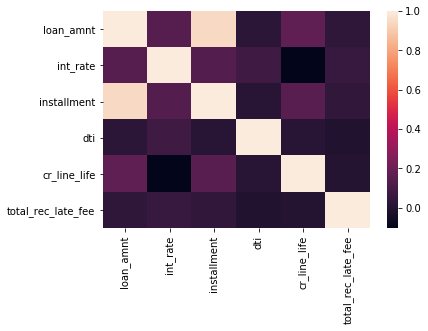

In [242]:
# heat map of data corr
# Data Visualization
# Building the Correlation matrix
sns.heatmap(auto_loan_full.corr())

## Encode X object type variables
### Columns to encode:
* term
* grade
* home_ownership
* verification_status
* pymnt_plan
* purpose
* addr_state
* application_type


### Find values_count of each encode coulmn

In [254]:
term_values = auto_loan_full['term'].value_counts()
grade_values = auto_loan_full['grade'].value_counts()
home_own_values = auto_loan_full['home_ownership'].value_counts()
verification_status_values = auto_loan_full['verification_status'].value_counts()
pymnt_plan_values = auto_loan_full['pymnt_plan'].value_counts()
purpose_values = auto_loan_full['purpose'].value_counts()
addr_state_values = auto_loan_full['addr_state'].value_counts()
application_type_values = auto_loan_full['application_type'].value_counts()
# y value encode
loan_status_values = auto_loan_full['loan_status'].value_counts()

loan_status_labels = auto_loan_full['loan_status'].values
loan_status_values

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [245]:
lb = LabelEncoder()

In [247]:
auto_loan_encoded = auto_loan_full.copy()

auto_loan_encoded['term']= lb.fit_transform(auto_loan_encoded['term'])
auto_loan_encoded['grade']= lb.fit_transform(auto_loan_encoded['grade'])
auto_loan_encoded['home_ownership']= lb.fit_transform(auto_loan_encoded['home_ownership'])
auto_loan_encoded['verification_status']= lb.fit_transform(auto_loan_encoded['verification_status'])
auto_loan_encoded['pymnt_plan']= lb.fit_transform(auto_loan_encoded['pymnt_plan'])
auto_loan_encoded['purpose']= lb.fit_transform(auto_loan_encoded['purpose'])
auto_loan_encoded['addr_state']= lb.fit_transform(auto_loan_encoded['addr_state'])
auto_loan_encoded['application_type']= lb.fit_transform(auto_loan_encoded['application_type'])



auto_loan_encoded.head(3)

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,cr_line_life,total_rec_late_fee,application_type
0,5000,0,10.65,162.87,1,5,2,Fully Paid,0,1,3,27.65,12483,0.0,0
1,2500,1,15.27,59.83,2,5,1,Charged Off,0,0,10,1.00,7280,0.0,0
2,2400,0,15.96,84.33,2,5,0,Fully Paid,0,11,14,8.72,6335,0.0,0


In [248]:
auto_loan_full.head(3)

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,cr_line_life,total_rec_late_fee,application_type
0,5000,36 months,10.65,162.87,B,RENT,Verified,Fully Paid,n,credit_card,AZ,27.65,12483,0.0,INDIVIDUAL
1,2500,60 months,15.27,59.83,C,RENT,Source Verified,Charged Off,n,car,GA,1.00,7280,0.0,INDIVIDUAL
2,2400,36 months,15.96,84.33,C,RENT,Not Verified,Fully Paid,n,small_business,IL,8.72,6335,0.0,INDIVIDUAL


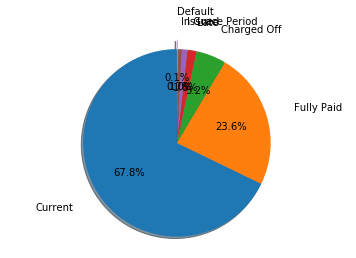

In [265]:
# Plot y column

labels = ['Current','Fully Paid','Charged Off','Late','Issued','In Grace Period','Default']
sizes = [601779,209711,46009,13948,8460,6253,1219]
explode = (0,0,0,0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,labeldistance=1.3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


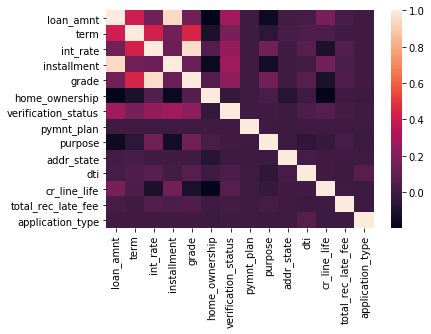

In [266]:
sns.heatmap(auto_loan_encoded.corr())

In [283]:
# Split, train, test model
# Seperating the Target variable
X = auto_loan_encoded.drop(['loan_status'], axis=1).values
y = auto_loan_encoded['loan_status'].values

In [293]:
# Splitting Dataset into Test and Train
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state =100)

In [294]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [312]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                    max_depth=15, min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [313]:
# Function to predict resale- cat
y_pred_en = clf_entropy.predict(X_test)
y_pred_en[:5]

array(['Current', 'Current', 'Fully Paid', 'Current', 'Current'],
      dtype=object)

In [314]:
# How well model performed
print(classification_report(y_test,y_pred_en))
print(confusion_matrix(y_test,y_pred_en))

                                                     precision    recall  f1-score   support

                                        Charged Off       0.26      0.05      0.09     13631
                                            Current       0.77      0.94      0.84    180576
                                            Default       0.00      0.00      0.00       370
Does not meet the credit policy. Status:Charged Off       0.19      0.11      0.14       244
 Does not meet the credit policy. Status:Fully Paid       0.37      0.22      0.28       614
                                         Fully Paid       0.61      0.40      0.49     62207
                                    In Grace Period       0.11      0.00      0.01      1871
                                             Issued       0.75      0.29      0.42      2501
                                  Late (16-30 days)       0.04      0.00      0.00       687
                                 Late (31-120 days)       0.16      0

In [315]:
# Checking Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  73.55135342243459


# Predict new value

In [291]:
auto_loan_full.head(3)

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,cr_line_life,total_rec_late_fee,application_type
0,5000,36 months,10.65,162.87,B,RENT,Verified,Fully Paid,n,credit_card,AZ,27.65,12483,0.0,INDIVIDUAL
1,2500,60 months,15.27,59.83,C,RENT,Source Verified,Charged Off,n,car,GA,1.00,7280,0.0,INDIVIDUAL
2,2400,36 months,15.96,84.33,C,RENT,Not Verified,Fully Paid,n,small_business,IL,8.72,6335,0.0,INDIVIDUAL


In [290]:
auto_loan_encoded.head(3)

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,cr_line_life,total_rec_late_fee,application_type
0,5000,0,10.65,162.87,1,5,2,Fully Paid,0,1,3,27.65,12483,0.0,0
1,2500,1,15.27,59.83,2,5,1,Charged Off,0,0,10,1.00,7280,0.0,0
2,2400,0,15.96,84.33,2,5,0,Fully Paid,0,11,14,8.72,6335,0.0,0


In [319]:
Xnew = [[8000,1,3,90,2,5,0,0,0,10,8.3,15000,1.5,0]]
Xnew = sc.transform(Xnew)
ynew = clf_entropy.predict(Xnew)
ynew

array(['Fully Paid'], dtype=object)

# Discussion:
 * The current classification decision tree model is not a great model
 * It only predicts with 70% accuracy
 * Model should be retrained to obtain 90%+ acc
 * Also, when testing different Xnew values, when state was updated, credit output changed
     * Consider a graph that plots credit repayment by state
 ## Future Implementation:
 * Users have a drop down menu of options, select varies inputs, model predicts the loan status
 * Or randomly assigned inputs and model predicts loan status
 ## Presnetation: Game of Life
 * Randomly assign inputs and model precits auto loan status
 * User picks frm list of cars, model will predict 'High/Low' resale value based on vehicle specs
 * Likliehood of fuel outage or fuel prices ?